<div align="center">
  <img src="https://avatars.githubusercontent.com/u/31736571?s=200&v=4" alt="Logo" width="200" high="200">
</div>


Dataset yang kami pilih dan/atau gunakan adalah **Hotel Bookings Data**, yang berisi informasi tentang pemesanan hotel mencakup berbagai aspek, seperti detail pemesanan, karakteristik tamu, dan status reservasi. Dataset ini mencakup dua jenis hotel : Resort Hotel dan City Hotel.

Data ini berasal dari kumpulan data permintaan pemesanan hotel terbuka yang disusun oleh ***Antonio, Almeida, dan Nunes (2019)***.
Berikut kami sertakan Informasi terkait sumber Dataset.

*   **
*   **Sumber** : (Github) ***Data Science Learning Community (rfordatascience)*** ; sumber dataset publik berasal dari repositori GitHub ***rfordatascience/tidytuesday***.
*   **
*   **Penjelasan Dataset dapat dilihat [Disini](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)**
*   **
*   **Dataset juga dapat didownload [Disini](https://www.dropbox.com/sh/qwdaldzkp8yrqwj/AADTj_WQcuKA0bsEeCKU__98a?dl=1)**
*   **



# **CATATAN**

***

**PERLU DIKETAHUI!!!**

> "*Bagian ini yaitu '**CATATAN**' dibuat setelah semua proses Analisis dari **Awal** hingga **Bagian Akhir** dari **Notebook Google Collab** ini **SELESAI**.*"

***




Dalam program ini, **Tidak Semua** Column Dataset kami gunakan. Column-column dataset yang kami gunakan secara detail dijelaskan dalam tabel dibawah ini.

| Nama Variabel            | Keterangan                                                                 |
|--------------------------|---------------------------------------------------------------------------|
| arrival_date_year        | Tahun kedatangan tamu                                                    |
| arrival_date_month       | Bulan kedatangan tamu                                                   |
| arrival_date_week_number | Nomor minggu dalam tahun dari tanggal kedatangan tamu                   |
| arrival_date_day_of_month| Hari dalam bulan kedatangan tamu                                         |
| is_canceled              | Indikator apakah reservasi dibatalkan (1) atau tidak (0)                |
| lead_time                | Jumlah hari antara reservasi dan kedatangan tamu                        |
| reserved_room_type       | Tipe kamar yang dipesan oleh tamu                                       |
| assigned_room_type       | Tipe kamar yang benar-benar diberikan                                    |
| deposit_type             | Tipe deposit reservasi (No Deposit, Refundable, Non Refund)            |
| total_of_special_requests| Jumlah permintaan khusus dari tamu                                      |
| adr                      | Average Daily Rate (pendapatan rata-rata per hari per reservasi)        |
| stays_in_weekend_nights  | Lama tinggal di akhir pekan (dalam malam)                               |
| stays_in_week_nights     | Lama tinggal di hari kerja (dalam malam)                                |
| previous_cancellations   | Jumlah pembatalan reservasi sebelumnya                                  |
| previous_bookings_not_canceled | Jumlah reservasi sebelumnya yang tidak dibatalkan                   |
| is_repeated_guest        | Apakah tamu tersebut adalah tamu berulang (1) atau tidak (0)            |

Selanjutnya, dari column-column tersebut kami membentuk beberapa **Column Baru** untuk membantu menemukan **Pola-pola** dan/atau **Insight Baru** selama proses Analisis. Column-column tersebut dijelaskan dalam Tabel dibawah ini.

| Nama Variabel       | Keterangan                                                                 |
|---------------------|---------------------------------------------------------------------------|
| arrival_date        | Kombinasi `arrival_date_year` dan `arrival_date_month` dalam format `YYYY-MM` |
| season              | Musim kedatangan berdasarkan `arrival_date_month`                        |
| success_ratio       | Rasio keberhasilan reservasi berdasarkan data reservasi sebelumnya       |
| total_stays         | Total lama tinggal, yaitu kombinasi `stays_in_weekend_nights` dan `stays_in_week_nights` |
| risk_score          | Skor risiko pembatalan yang dihitung dari kombinasi `lead_time`, `deposit_type`, dan `season` |

Pada Bagian '**SISTEM PREDIKSI PEMBATALAN**', kami mengikuti Pola *Data -> Wawasan -> Tindakan*. Secara detail kami jelaskan dibawah ini.

***Data -> Wawasan -> Tindakan dalam Sistem Prediksi Pembatalan Reservasi Hotel***

1. **Data** :
   Program ini menggunakan variabel-variabel yang relevan, seperti:
   - **lead time**
   - **total of special requests**
   - **total stays**
   - **previous cancellations**
   - **deposit type**
   
   Variabel-variabel ini dipilih berdasarkan analisis data pembatalan yang telah dilakukan. Data ini merupakan langkah pertama dalam memahami pola pembatalan dan digunakan untuk melatih model prediksi.

2. **Wawasan** :
   Berdasarkan analisis data yang dilakukan, ditemukan beberapa wawasan penting, seperti:
   - **Lead time** dan **deposit type** memiliki pengaruh signifikan terhadap kemungkinan pembatalan.
   
   Wawasan ini diterjemahkan ke dalam pemilihan fitur yang relevan untuk model prediksi. Model **RandomForestClassifier** kemudian dilatih menggunakan fitur-fitur tersebut untuk memprediksi pembatalan berdasarkan data yang tersedia.

3. **Tindakan** :
   Program ini menerjemahkan wawasan yang diperoleh menjadi **tindakan** praktis, yakni:
   - Penerapan model prediksi untuk memprediksi apakah suatu reservasi akan dibatalkan atau tidak berdasarkan input pengguna.
   
   Tindakan ini memungkinkan manajer hotel untuk mengantisipasi pembatalan, mengambil langkah-langkah pencegahan, dan mengelola reservasi dengan lebih baik.


# **LIBRARY**



> Install Pustaka



In [ ]:
!pip install gdown



> Import Library



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sistem Prediksi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np



> Setting Library



In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

# **DATASET**



> Dataset kami download dari github dan upload di drive pribadi. Kemudian, kami menggunakan **gdown** untuk mengakses dataset didalam Notebok Collab ini



In [ ]:
!gdown "https://drive.google.com/uc?id=1e37E6ZVVmJF9G74hg6ZbZAidIPtQ7vfj" -O hotels.csv

Downloading...
From: https://drive.google.com/uc?id=1e37E6ZVVmJF9G74hg6ZbZAidIPtQ7vfj
To: /content/hotels.csv
100% 16.9M/16.9M [00:00<00:00, 56.3MB/s]


In [ ]:
data = pd.read_csv("hotels.csv")
data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66253,City Hotel,1,99,2017,April,15,15,2,4,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,58.0,NaN,0,Transient-Party,105.00,0,0,Canceled,2017-03-07
90779,City Hotel,0,3,2016,June,24,10,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,E,2,No Deposit,187.0,NaN,0,Transient-Party,120.00,0,0,Check-Out,2016-06-12
78929,City Hotel,0,35,2015,October,42,17,1,1,2,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,113.85,0,1,Check-Out,2015-10-19
106717,City Hotel,0,0,2017,February,9,28,0,2,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,10.0,NaN,0,Transient,85.00,0,0,Check-Out,2017-03-02
102745,City Hotel,0,1,2016,December,50,5,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,88.00,0,1,Check-Out,2016-12-06
71538,City Hotel,1,266,2017,July,27,7,0,2,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,107.10,0,2,Canceled,2017-05-16
113516,City Hotel,0,0,2017,June,23,7,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,170.00,0,1,Check-Out,2017-06-08
21495,Resort Hotel,0,0,2016,March,13,22,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,D,D,0,No Deposit,NaN,290.0,0,Transient,67.00,0,0,Check-Out,2016-03-23
53717,City Hotel,1,101,2016,June,27,27,1,5,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,140.00,0,0,Canceled,2016-05-06
103720,City Hotel,0,78,2016,December,53,27,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,114.90,0,2,Check-Out,2016-12-30


# **EDA (EXPLORATORY DATA ANALYSIS)**



> Berikut kami tampilkan **Informasi Umum Dataset**, Untuk melihat beberapa informasi sebagai berikut.


> *   *Jumlah Entries setiap column dalam dataset*
> *   *column-column dalam dataset*
> *   *Jumlah data setiap column*
> *   *type data setiap column*




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            



> Kami tampilkan juga **Statistik Deskriptif**, Untuk melihat beberapa informasi sebagai berikut.


> *   *Jumlah Data setiap column dalam dataset*
> *   *Jumlah Nilai Unique setiap column*
> *   *Frequensi setiap column*
> *   *Nilai Rata-rata setiap column*
> *   *Nilai Minimum dan Maximum setiap column*
> *   *Nilai Quartil 1, 2, 3 setiap column*
> *   *Nilai Standar Deviasi setiap column*




In [ ]:
data.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN




> Kami mencetak nilai unik setiap column untuk melihat nilai masing masing column untuk dianalisis



In [ ]:
for column in data.columns:
    print(f"Nilai unik untuk kolom {column}:")
    print(data[column].unique())
    print("-" *100)

Nilai unik untuk kolom hotel:
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
Nilai unik untuk kolom is_canceled:
[0 1]
----------------------------------------------------------------------------------------------------
Nilai unik untuk kolom lead_time:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 



> Karena pada Informasi Umum terdapat Jumlah Data yang berbeda disetiap Column, Maka kami melekukan pengecekan terhadap setiap Column untuk nilai yang Hilang (Missing Value)



In [ ]:
print("\n\t--- Nilai yang Hilang ---")
missing_values = data.isnull().sum()
print(missing_values)


	--- Nilai yang Hilang ---
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

Dari pengecekan diatas, kami menemukan kolom yang memiliki nilai NaN dan Null, diantaranya :

*   *country ; type float64 dengan 4 Data Hilang*
*   *country ; type object dengan 488 Data Hilang*
*   *agent ; type float64 dengan 16340 Data Hilang*
*   *company ; type float64 dengan 112593 Data Hilang*

Sehingga dalam hal ini, kami akan melakukan penanganan missing value terlebih dahulu sebelum masuk pada proses lebih lanjut.



Dari pengecekan **Informasi Umum Dataset** juga kami menemukan type data yang tidak sesuai, yaitu column *reservation_status_date* yang memiliki type data '*object*'.
Sehingga dari hal itu, kami akan melakukan penggantian type data yaitu '*object*' menjadi type data '*date*' untuk column *reservation_status_date*

# **PREPROCESSING & INSIGHT**

## Perbersihan Data



> Penanganan Missing Value yang kami lakukan antara lain :     
***
> 1.   Column **children**, Nilai yang hilang kami ganti dengan angka "0" yang menandakan tidak ada anak-anak
***
> 2.   Column **country**, Nilai yang hilang kami ganti dengan "Unknown" yang menandakan tidak diketahui
***
> 3.   Column **agent** dan **company**, Nilai yang hilang kami ganti dengan angka "0" yang menandakan tidak ada agen/perusahaan
***





In [ ]:
data['children'] = data['children'].fillna(0)
data['country'] = data['country'].fillna("Unknown")
data['agent'] = data['agent'].fillna("0")
data['company'] = data['company'].fillna("0")



> Pengecekan Kembali



In [ ]:
print("\n\t--- Nilai yang Hilang ---")
missing_values = data.isnull().sum()
print(missing_values)


	--- Nilai yang Hilang ---
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0




> Selanjutnya Penanganan untuk column *reservation_status_date* dari type data '*object*' ke type data '*date*'





In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')
print(data['reservation_status_date'].dtype)

datetime64[ns]




> Menampilkan Dataset setelah Pembersihan





In [ ]:
data.sample(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29414,Resort Hotel,0,32,2016,October,44,26,0,2,2,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,0,0,Transient,136.00,1,1,Check-Out,2016-10-28
11109,Resort Hotel,1,29,2017,April,16,20,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,D,0,No Deposit,0,169.0,0,Transient-Party,50.00,0,0,Canceled,2017-04-19
61230,City Hotel,1,71,2016,December,50,5,1,2,2,0.0,0,SC,LUX,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,9.0,0,0,Transient,79.20,0,1,Canceled,2016-11-18
11482,Resort Hotel,1,140,2017,May,19,10,2,5,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,96.0,0,0,Transient-Party,48.00,0,0,Canceled,2017-01-12
105156,City Hotel,0,77,2017,January,5,29,2,0,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,0,Transient,79.20,0,1,Check-Out,2017-01-31
70166,City Hotel,1,40,2017,June,24,11,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,7.0,0,0,Transient,150.00,0,1,Canceled,2017-05-02
26682,Resort Hotel,0,2,2016,August,33,8,1,0,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,G,G,0,No Deposit,250.0,0,0,Transient,335.00,0,0,Check-Out,2016-08-09
73343,City Hotel,1,215,2017,August,33,19,1,1,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,0,Transient,94.05,0,0,Canceled,2017-01-21
65962,City Hotel,1,80,2017,April,15,11,0,3,3,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,0,Transient,228.00,0,1,Canceled,2017-04-02
37509,Resort Hotel,0,232,2017,June,24,13,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,436.0,0,0,Transient,73.63,0,1,Check-Out,2017-06-20


## Insight/Menemukan Pola-Pola



Setelah melalui Pembersihan Data diatas, kami akan menemukan beberapa Insight Baru atau Pola Pola dari Dataset ini. Dimana dari Pola Pola yang ditemukan, kami dapat memberikan sebuah rekomendasi ataupun strategi pemasaran yang berkaitan dengan Bookings Hotel.



***


> Langkah Pertama, kami sebut dengan 'Siapa Pelanggan Kita?'. kami akan mencari tau dahulu apa yang disajikan didalam dataset, dengan mendapatkan jawaban dari pertanyaan pertanyaan berikut.


***

> 1. Dari mana tamu berasal (akan memanfaatkan column '**country**')?
> 2. Apakah mereka datang sendiri, bersama keluarga, atau grup (akan memanfaatkan column-column seperti '**adults**', '**children**', '**babies**')?
> 3. Bagaimana perbedaan waktu menginap antara akhir pekan dan hari kerja (yang memanfaatkan column-column seperti '**stays_in_weekend_nights**' vs '**stays_in_week_nights**')?

***






> Kami Menampilkan dan Menghitung 10 negara teratas berdasarkan jumlah tamu untuk menjawab pertanyaan pertama



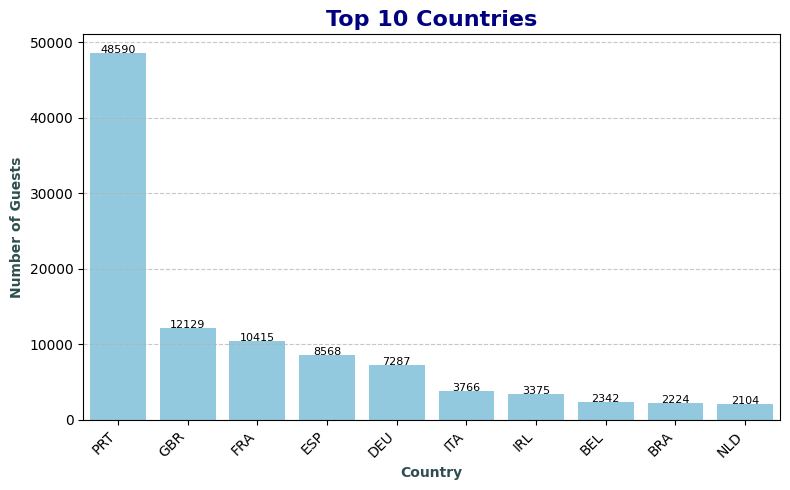

In [ ]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, color='skyblue')
plt.title('Top 10 Countries', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Country', fontsize=10, fontweight='bold', color='darkslategray')
plt.ylabel('Number of Guests', fontsize=10, fontweight='bold', color='darkslategray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10, ha='right')

for index, value in enumerate(top_countries.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()



> Menghitung rata-rata jumlah tamu per reservasi untuk menjawab pertanyaan kedua.



In [ ]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']
avg_guests = data['total_guests'].mean()

print(f'Rata-rata jumlah tamu per reservasi : {avg_guests:.0f} Orang')

Rata-rata jumlah tamu per reservasi : 2 Orang




> Membandingkan jumlah malam menginap antara akhir pekan dan hari kerja untuk menjawab pertanyaan ketiga



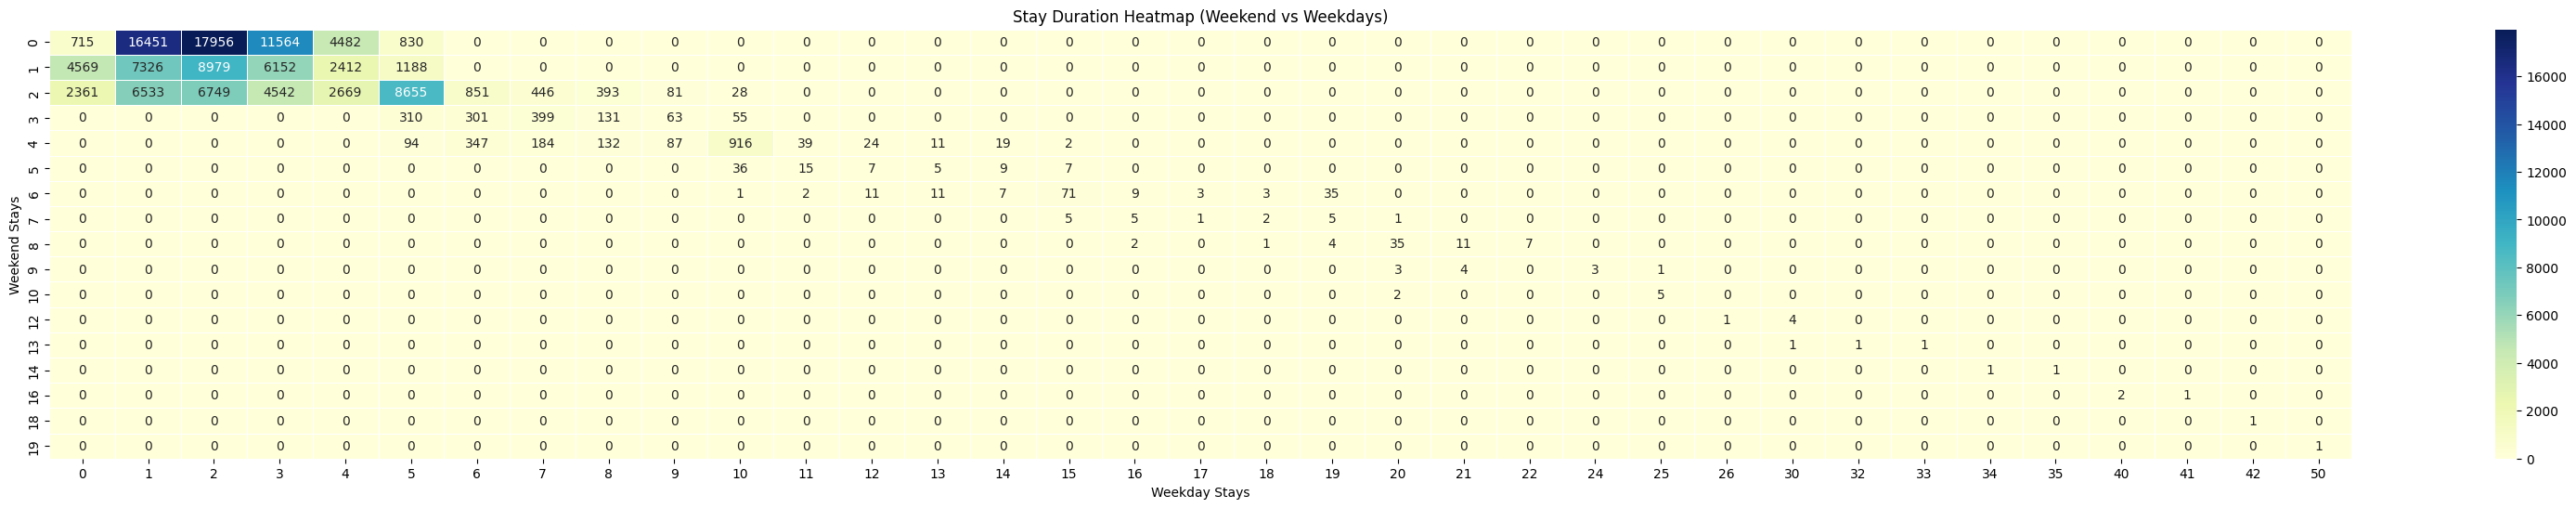

In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['stay_type'] = data['stays_in_weekend_nights'].apply(lambda x: 'Weekend' if x > 0 else 'Weekday')

stay_matrix = data.groupby(['stays_in_weekend_nights', 'stays_in_week_nights']).size().unstack(fill_value=0)
plt.figure(figsize=(40,6))
sns.heatmap(stay_matrix, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Stay Duration Heatmap (Weekend vs Weekdays)')
plt.xlabel('Weekday Stays')
plt.ylabel('Weekend Stays')
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> *Jumlah tamu tertinggi berasal dari Portugal (PRT) dengan 48.590 tamu, diikuti oleh Inggris (GBR) dengan 12.129 tamu dan Prancis (FRA) dengan 10.415 tamu. Rata-rata jumlah tamu per reservasi adalah 2 orang. Untuk jumlah malam tinggal, sebagian besar tamu menginap antara 1 hingga 2 malam di akhir pekan.*


***

***


> Langkah kedua, kami sebut dengan 'Pola Waktu Kedatangan'. Tentu setelah kami mengetahui siapa saja pengunjung yang datang, kami juga ingin mengetahui kapan mereka datang. Sehingga terdapat beberapa pertanyaan yang harus kami jawab, diantaranya.

***

> 1. Kapan waktu reservasi paling populer (akan memanfaatkan dua column yaitu '**arrival_date_year**', '**arrival_date_month**')?
> 2. Adakah tren mingguan (akan memanfaatkan column '**arrival_date_week_number**') ?

***



> Kami menggabungkan tahun dan bulan untuk analisis bulanan untuk menjawab pertanyaan pertama



In [ ]:
monthly_reservations = data.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')
monthly_reservations['arrival_date'] = monthly_reservations['arrival_date_year'].astype(str) + '-' + monthly_reservations['arrival_date_month'].astype(str)
monthly_reservations.sample(5)

,arrival_date_year,arrival_date_month,count,arrival_date
3,2015,November,2340,2015-November
12,2016,June,5292,2016-June
9,2016,February,3891,2016-February
25,2017,May,6313,2017-May
13,2016,March,4824,2016-March




> Kami buat visualisasinya untuk melihat time series tren bulanan reservasi



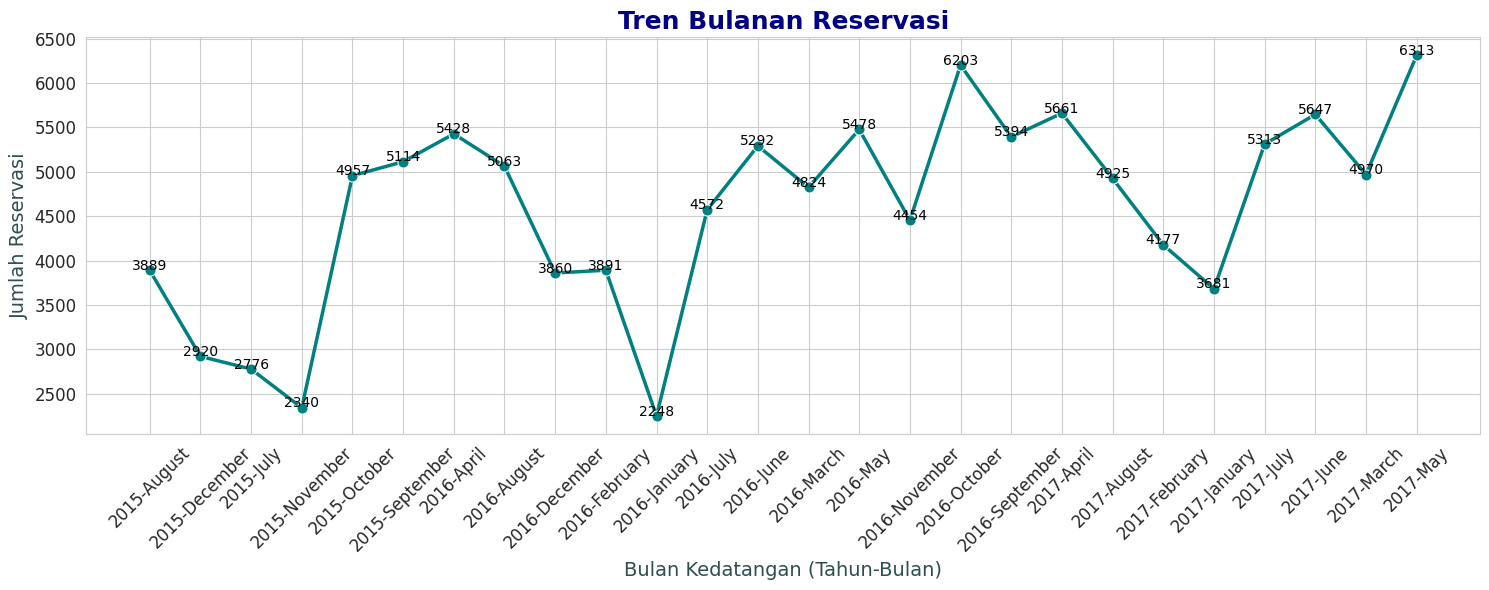

In [ ]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.lineplot(data=monthly_reservations, x='arrival_date', y='count', marker='o', linewidth=2.5, markersize=8, color='teal')

plt.title('Tren Bulanan Reservasi', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Bulan Kedatangan (Tahun-Bulan)', fontsize=14, color='darkslategray')
plt.ylabel('Jumlah Reservasi', fontsize=14, color='darkslategray')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for x, y in zip(monthly_reservations['arrival_date'], monthly_reservations['count']):
    plt.text(x, y + 5, str(y), fontsize=10, ha='center', color='black')

plt.tight_layout()
plt.show()




> Selanjutnya, kami menghitung distribusi mingguan untuk menjawab pertanyaan kedua



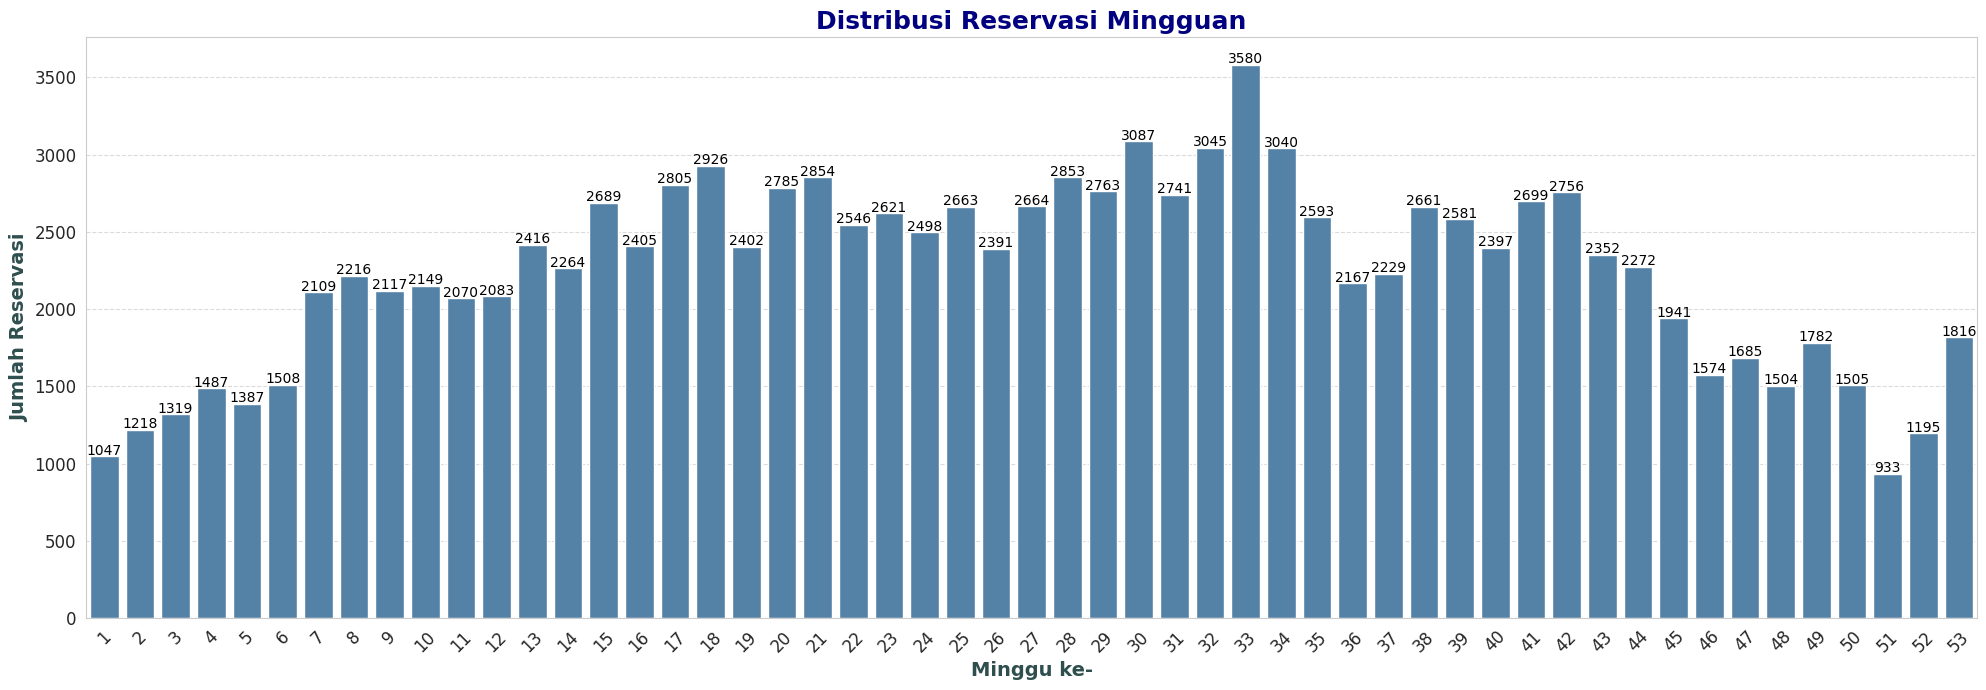

In [ ]:
weekly_reservations = data['arrival_date_week_number'].value_counts().sort_index()

plt.figure(figsize=(20, 7))
sns.set_style("whitegrid")
sns.barplot(x=weekly_reservations.index, y=weekly_reservations.values, color='steelblue')

plt.title('Distribusi Reservasi Mingguan', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Minggu ke-', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah Reservasi', fontsize=14, fontweight='bold', color='darkslategray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

for index, value in enumerate(weekly_reservations.values):
    plt.text(index, value + 10, str(value), ha='center', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




> Dengan menjawab dua pertanyaan tersebut, kemudian ada satu pertanyaan yang muncul, yaitu "*Bagaimana hubungan antara tren mingguan dan pembatalan?*". Sehingga kami tampilkan Heatmap hubungan antara '**arrival_date_week_number**' dan pembatalan ('**is_canceled**')



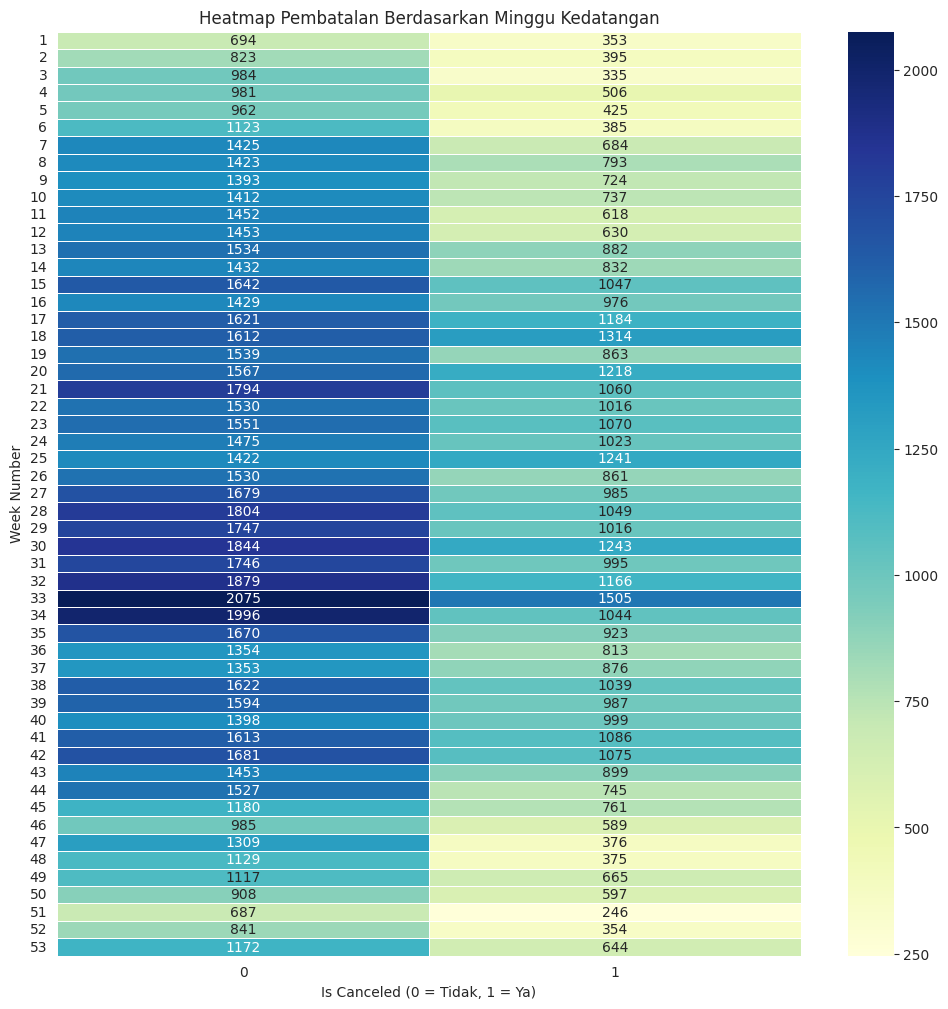

In [ ]:
heatmap_data = data.groupby(['arrival_date_week_number', 'is_canceled']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap Pembatalan Berdasarkan Minggu Kedatangan')
plt.xlabel('Is Canceled (0 = Tidak, 1 = Ya)')
plt.ylabel('Week Number')
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> ***Tren Bulanan Reservasi*** : *Puncak reservasi terjadi pada bulan Mei 2017 (6313 reservasi) dan Oktober 2016 (6203 reservasi), dengan pola peningkatan reservasi di bulan-bulan musim panas dan musim liburan*

> ***Tren Mingguan*** : *Minggu ke-33 mencatat jumlah reservasi tertinggi (3580 reservasi), diikuti minggu ke-32 (3045 reservasi). Pola mingguan menunjukkan lonjakan reservasi pada pertengahan tahun.*

> ***Pembatalan Berdasarkan Minggu Kedatangan*** : *Pembatalan tertinggi terjadi pada minggu ke-33 dengan 1505 pembatalan, diikuti minggu ke-30 dengan 1243 pembatalan. Meski jumlah reservasi tinggi pada minggu-minggu tersebut, tingkat pembatalannya juga signifikan.*


***

Dari Hasil Ringkasan tersebut, Kami dapat membuat sebuah **Insight Baru** yaitu variabel untuk menunjukkan musim reservasi (Winter, Spring, Summer, Autumn) berdasarkan bulan kedatangan untuk analisis musiman.

In [ ]:
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

data['season'] = data['arrival_date_month'].map(season_mapping)
data.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,stay_type,season
87061,City Hotel,0,14,2016,April,16,13,0,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,0,Transient-Party,90.0,0,1,Check-Out,2016-04-14,2.0,1,Weekday,Spring
30523,Resort Hotel,0,32,2016,November,47,19,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,57.0,0,0,Transient,56.6,0,0,Check-Out,2016-11-26,2.0,7,Weekend,Autumn
80495,City Hotel,1,22,2015,November,47,17,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,127.0,0,Transient-Party,62.0,0,0,Canceled,2015-11-17,1.0,1,Weekday,Autumn


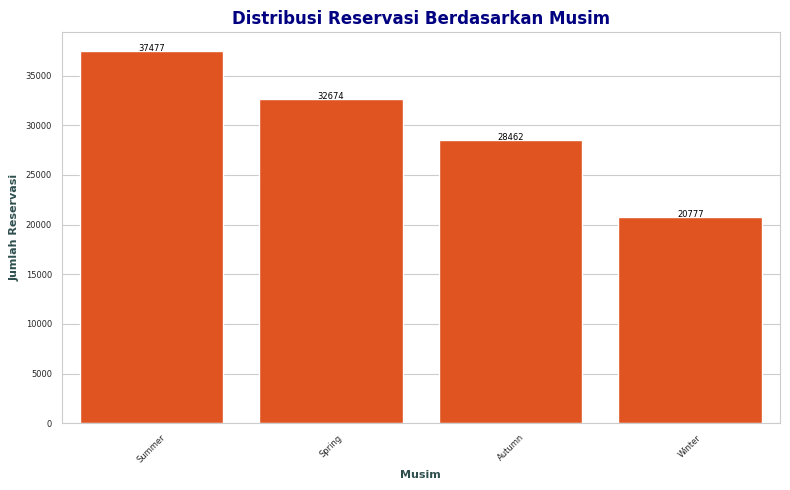

In [ ]:
season_reservations = data['season'].value_counts()

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(x=season_reservations.index, y=season_reservations.values, color='orangered')

plt.title('Distribusi Reservasi Berdasarkan Musim', fontsize=12, fontweight='bold', color='navy')
plt.xlabel('Musim', fontsize=8, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah Reservasi', fontsize=8, fontweight='bold', color='darkslategray')
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

for index, value in enumerate(season_reservations.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=6, color='black')

plt.tight_layout()
plt.show()

***


> Langkah ketiga, kami sebut dengan 'Perilaku Reservasi'. Setelah kami mengetahui kapan tamu akan datang, perlu adanya mengetahui bagaimana perilaku tamu dalam reservasi. Beberapa pertanyaan yang perlu dijawab sebagai berikut

***

> 1. Berapa lama waktu antara reservasi dan kedatangan (akan memanfaatkan column '**lead_time**')?
> 2. Apakah tamu sering mengubah atau membatalkan reservasi (tiga column yang digunakan, yaitu '**previous_cancellations**', '**previous_bookings_not_canceled**', '**booking_changes**')?

***



> Untuk menjawab pertanyaan pertama, kami akan membuat distribusi dari column '**lead_time**'



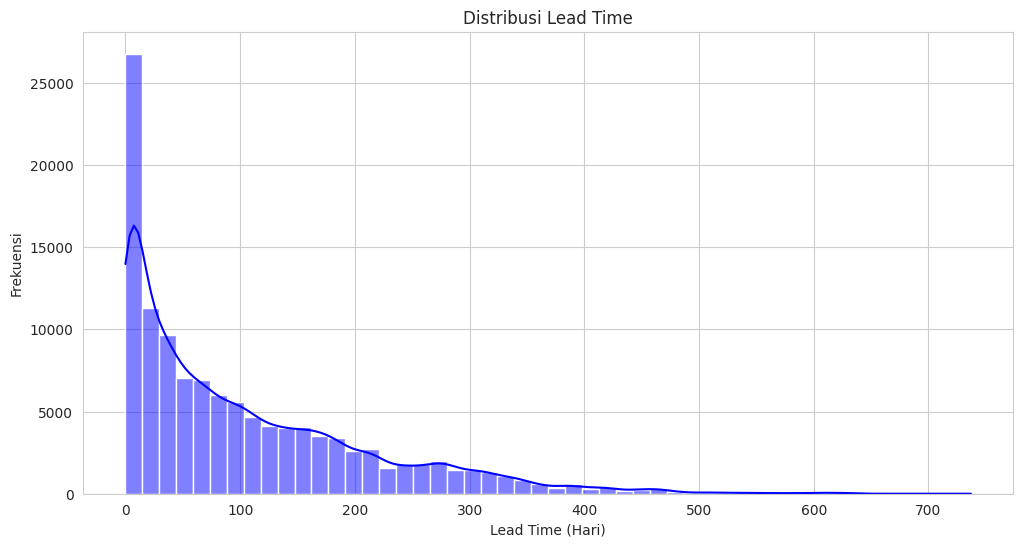

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribusi Lead Time')
plt.xlabel('Lead Time (Hari)')
plt.ylabel('Frekuensi')
plt.show()



> Sedangkan untuk menjawab pertanyaan kedua, pertama kami membuat visualisasi barplot antara column '**previous_cancellations**' dan '**booking_changes**'



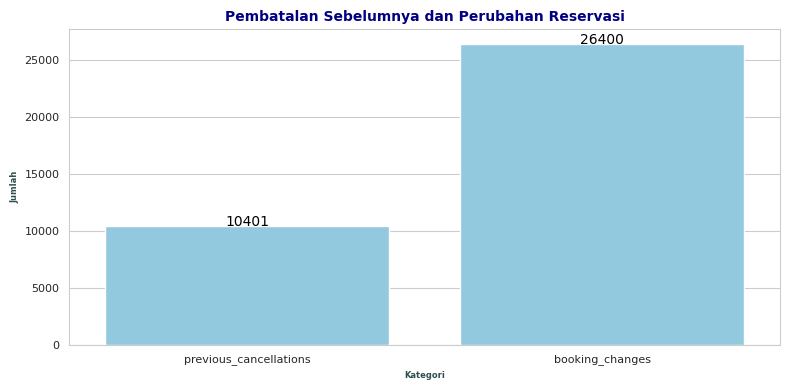

In [ ]:
cancel_change_data = data[['previous_cancellations', 'booking_changes']].sum()

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.barplot(x=cancel_change_data.index, y=cancel_change_data.values, color='skyblue')

plt.title('Pembatalan Sebelumnya dan Perubahan Reservasi', fontsize=10, fontweight='bold', color='navy')
plt.xlabel('Kategori', fontsize=6, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah', fontsize=6, fontweight='bold', color='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for index, value in enumerate(cancel_change_data.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> *Distribusi frekuensi lead time menunjukkan konsentrasi tinggi pada lead time pendek, dengan banyak reservasi terjadi dalam waktu kurang dari 30 hari sebelum kedatangan. Selain itu, data menunjukkan jumlah pembatalan sebelumnya mencapai 10.401 dan perubahan reservasi sebanyak 26.400, menandakan adanya aktivitas pembatalan dan perubahan yang signifikan pada reservasi.*


***

Dari Hasil Tahap ini, Kami dapat membuat sebuah **Insight Baru** yaitu variabel untuk menunjukkan Rasio Keberhasilan Reservasi dengan menggabungkan '**previous_cancellations**' dan '**previous_bookings_not_canceled**' menjadi rasio keberhasilan.

In [ ]:
success_ratio = data['previous_bookings_not_canceled'] / (data['previous_cancellations'] + data['previous_bookings_not_canceled'] + 1e-10)
data['success_ratio'] = success_ratio

data['success_ratio'].unique()

array([0.        , 1.        , 1.        , 0.75      , 0.5       ,
       1.        , 0.66666667, 1.        , 1.        , 0.8       ,
       0.83333333, 0.85714286, 0.875     , 0.88888889, 1.        ,
       0.9       , 0.90909091, 0.91666667, 0.92307692, 1.        ,
       1.        , 0.5       , 0.6       , 0.66666667, 0.71428571,
       0.75      , 0.77777778, 0.8       , 0.81818182, 0.83333333,
       0.84615385, 0.85714286, 0.86666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96428571, 0.96551724, 0.96666667, 0.96774194, 0.4       ,
       0.92857143, 0.875     , 0.76923077, 0.73333333, 0.75      ,
       0.76470588, 0.33333333, 0.93333333, 0.9375    , 0.94117647,
       0.94444444, 0.94736842, 0.95      , 0.95238095, 0.95454545,
       0.95652174, 0.95833333, 0.96      , 0.96153846, 0.96296

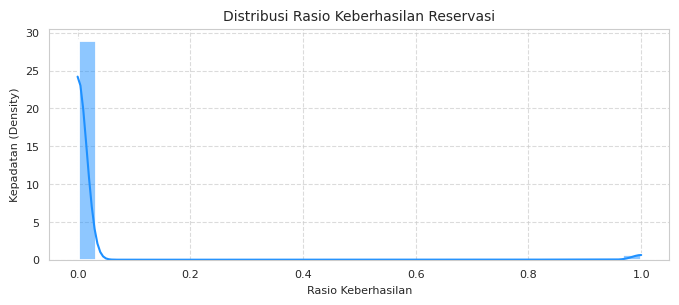

In [ ]:
plt.figure(figsize=(8, 3))
sns.histplot(data['success_ratio'], bins=30, kde=True, color='dodgerblue', stat="density", linewidth=2)
plt.title('Distribusi Rasio Keberhasilan Reservasi', fontsize=10)
plt.xlabel('Rasio Keberhasilan', fontsize=8)
plt.ylabel('Kepadatan (Density)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

***


> Langkah keempat, kami sebut dengan 'Preferensi Pelanggan'. Kami ingin mengetahui preferensi tamu yang datang. Dimana hal itu kami cantumkan dalam beberapa pertanyaan yang perlu dijawab sebagai berikut.

***

> 1. Jenis kamar apa yang paling sering dipesan ('**reserved_room_type**') dan yang akhirnya diberikan ('**assigned_room_type**')?
> 2. Apakah ada hubungan antara jenis deposit ('**deposit_type**') dan pembatalan?
> 3. Seberapa banyak permintaan khusus ('**total_of_special_requests**') diajukan oleh tamu?

***



> Untuk menjawab pertanyaan pertama, kami hubungkan antara jenis kamar yang paling sering dipesan vs yang diberikan



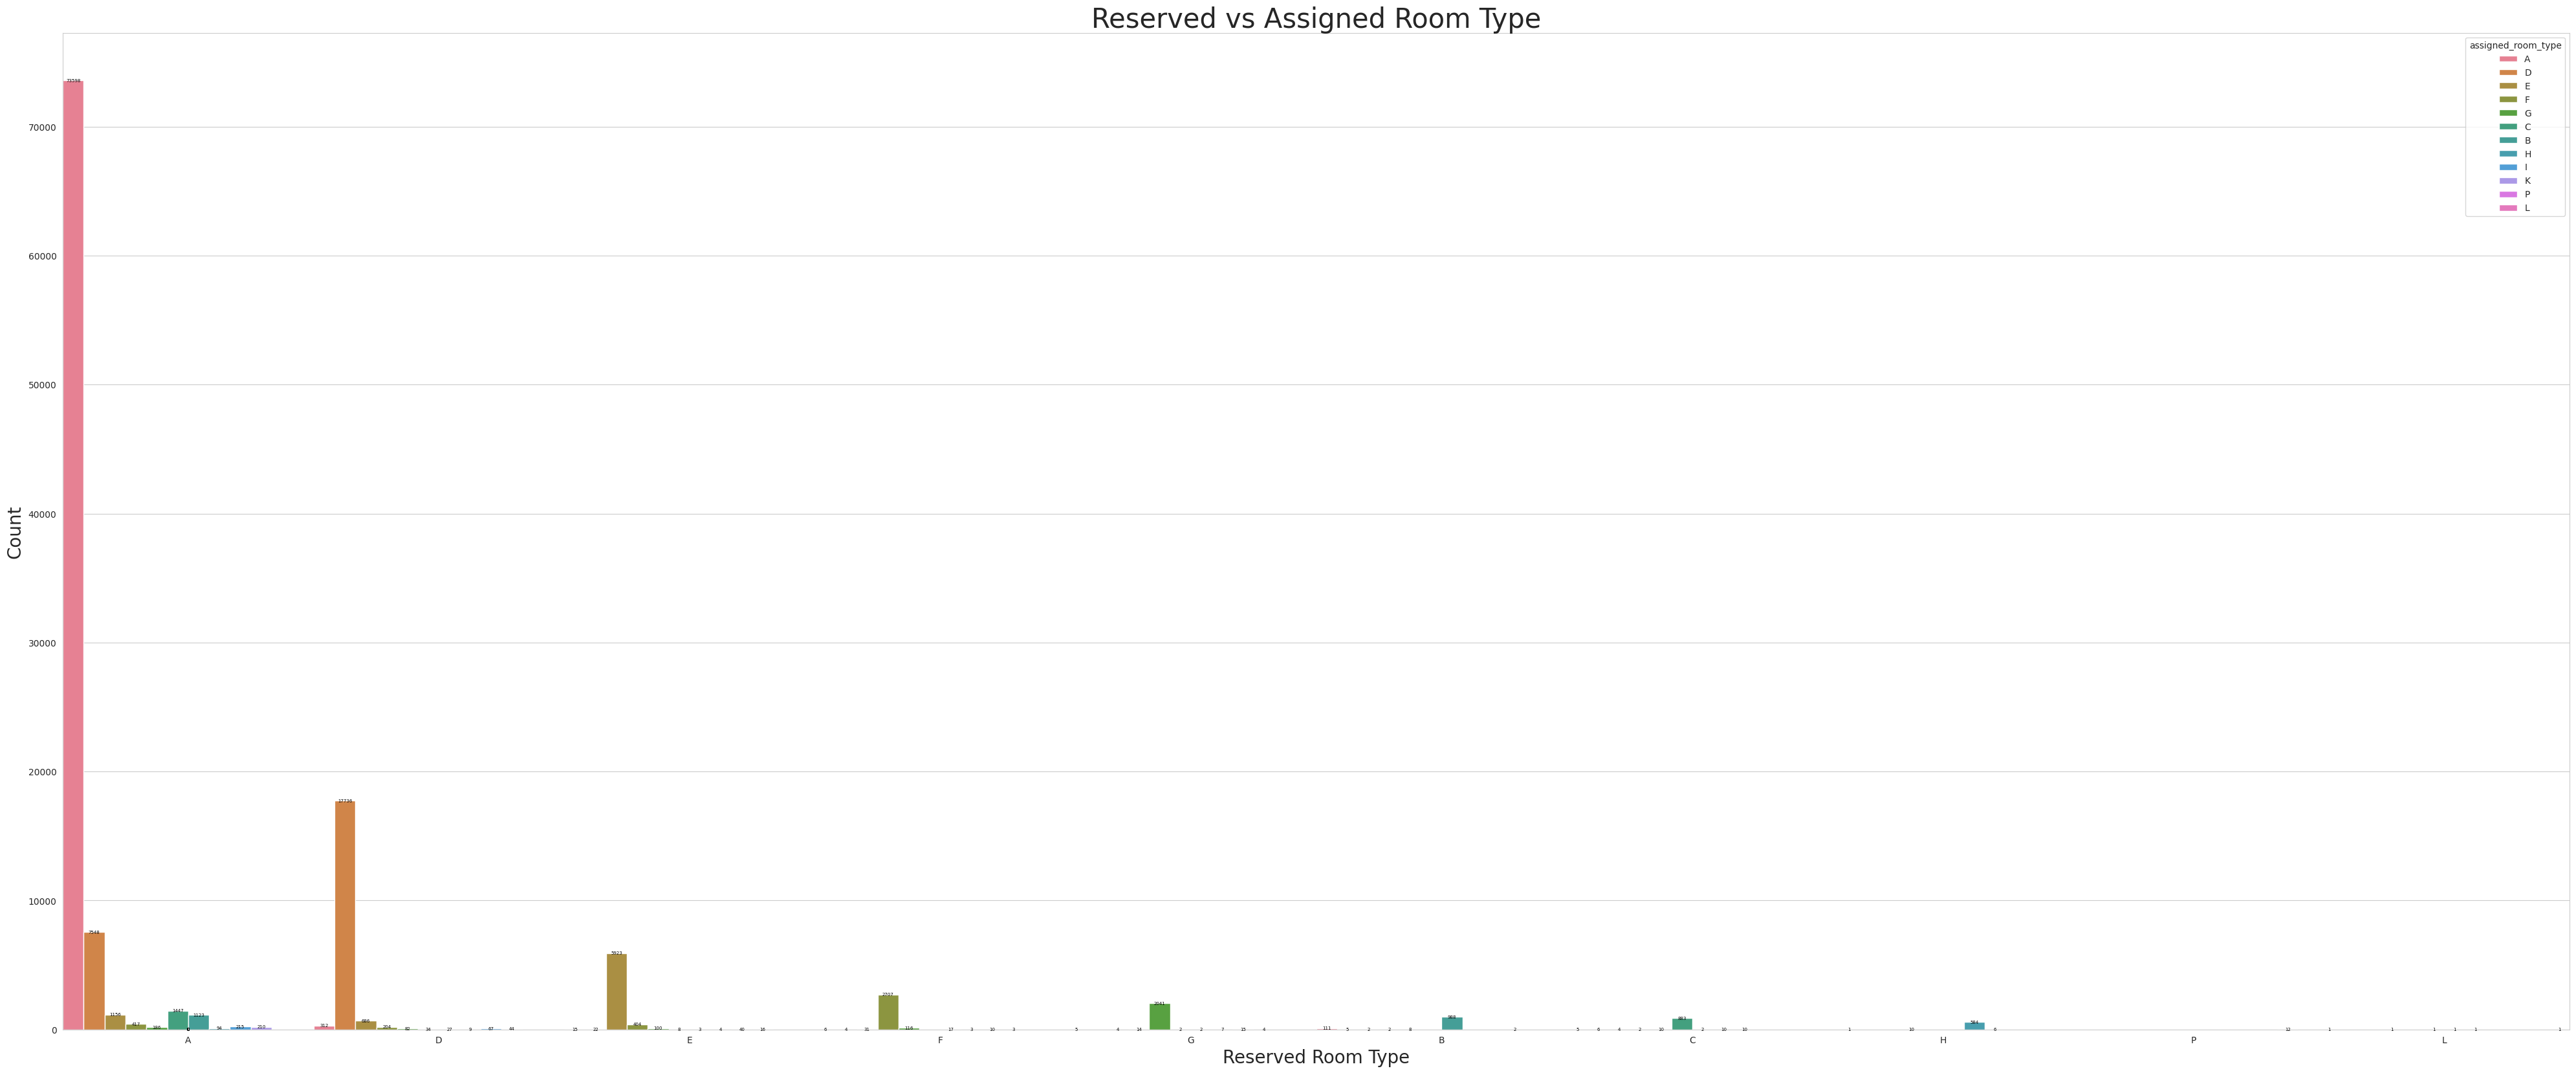

In [ ]:
room_type_data = data[['reserved_room_type', 'assigned_room_type']]
room_counts = room_type_data.value_counts().reset_index(name='count')

plt.figure(figsize=(50, 20))
sns.barplot(data=room_counts, x='reserved_room_type', y='count', hue='assigned_room_type', dodge=True, width=1)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
             ha='center', va='center', fontsize=5, color='black')

plt.title('Reserved vs Assigned Room Type', fontsize=30)
plt.xlabel('Reserved Room Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

In [ ]:
print(room_counts)

   reserved_room_type assigned_room_type  count
0                   A                  A  73598
1                   D                  D  17736
2                   A                  D   7548
3                   E                  E   5923
4                   F                  F   2707
5                   G                  G   2041
6                   A                  C   1447
7                   A                  E   1156
8                   A                  B   1123
9                   B                  B    988
10                  C                  C    883
11                  D                  E    686
12                  H                  H    584
13                  A                  F    417
14                  E                  F    404
15                  D                  A    312
16                  A                  I    215
17                  A                  K    210
18                  D                  F    204
19                  A                  G



> Untuk menjawab pertanyaan kedua, kami juga menghubungkan antara deposit_type dengan pembatalan



<Figure size 1200x600 with 0 Axes>

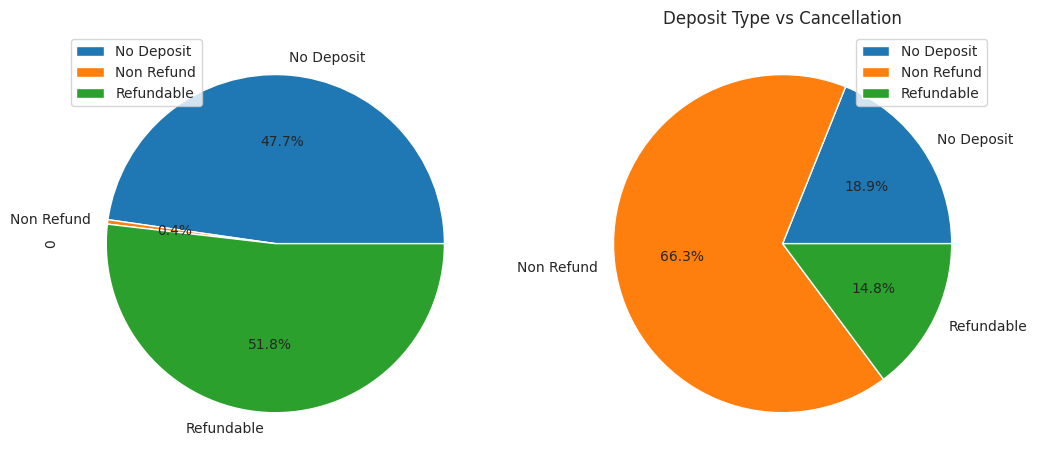

In [ ]:
deposit_cancel_data = data.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12,6))
deposit_cancel_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12,6))
plt.title('Deposit Type vs Cancellation')
plt.ylabel('')
plt.show()



> Untuk pertanyaan ketiga, kami menghitung total permintaan khusus untuk setiap reservasi



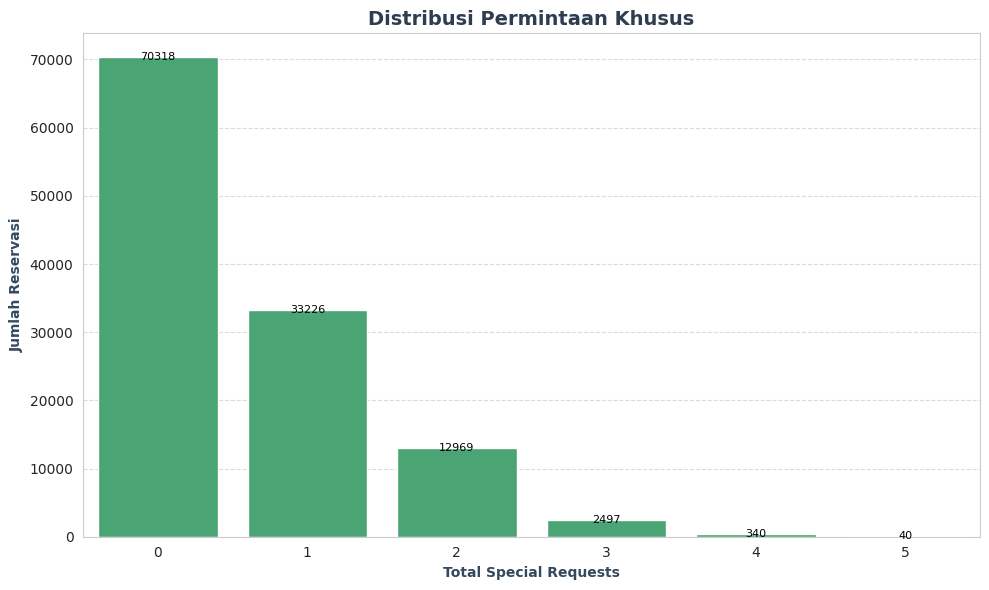

In [ ]:
total_special_requests = data['total_of_special_requests'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=total_special_requests.index, y=total_special_requests.values, color='mediumseagreen')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
             ha='center', va='center', fontsize=8, color='black')

plt.title('Distribusi Permintaan Khusus', fontsize=14, fontweight='bold', color='#2C3E50')
plt.xlabel('Total Special Requests', fontsize=10, fontweight='bold', color='#34495E')
plt.ylabel('Jumlah Reservasi', fontsize=10, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> *Pesanan yang paling sering dipesan dan diberikan adalah tipe kamar A, diikuti oleh tipe kamar D, dengan sebagian besar permintaan berada pada tipe kamar yang sama antara yang dipesan dan yang diberikan. Hubungan antara tipe deposit dan pembatalan menunjukkan bahwa hampir 72% dari pemesanan tanpa deposit tidak dibatalkan, sedangkan hampir 99% pemesanan dengan deposit non-refundable dibatalkan. Jumlah permintaan khusus pada reservasi bervariasi, dengan sebagian besar pemesanan memiliki sedikit atau tanpa permintaan khusus.*


***

Dari Hasil Tahap ini, Kami dapat membuat sebuah **Insight Baru** namun bukan dalam bentuk sebuah variabel baru, namun hanya menghitung persentase perubahan kamar (**reserved_room_type** ≠ **assigned_room_type**) untuk setiap jenis reservasi.

In [ ]:
room_change_rate = (data['reserved_room_type'] != data['assigned_room_type']).mean() * 100
print(f"Persentase perubahan kamar : {room_change_rate:.2f}%")

Persentase perubahan kamar : 12.49%


Hasilnya :
***


> *Persentase perubahan kamar mencapai 12,49%, menunjukkan adanya perbedaan signifikan antara tipe kamar yang dipesan dan yang diberikan.*


***

***


> Langkah kelima, kami sebut dengan 'Pendapatan dan Penawaran'. Setelah mempelajari terkait pelanggan/tamu, kami beralih untuk mempelajari Hotel itu sendiri dari sisi pendapatan dan penawaran, yang dimana dicerminkan dalam beberapa pertanyaan berikut.

***

> 1. Berapa rata-rata pendapatan per reservasi (menggunakan column '**adr**')?
> 2. Bagaimana pendapatan bervariasi berdasarkan jumlah tamu, lama tinggal, atau musim reservasi?

***



> Untuk menjawab pertanyaan pertama, kami membuat visualisasi rata-rata pendapatan per reservasi dengan memanfaatkan column **adr**



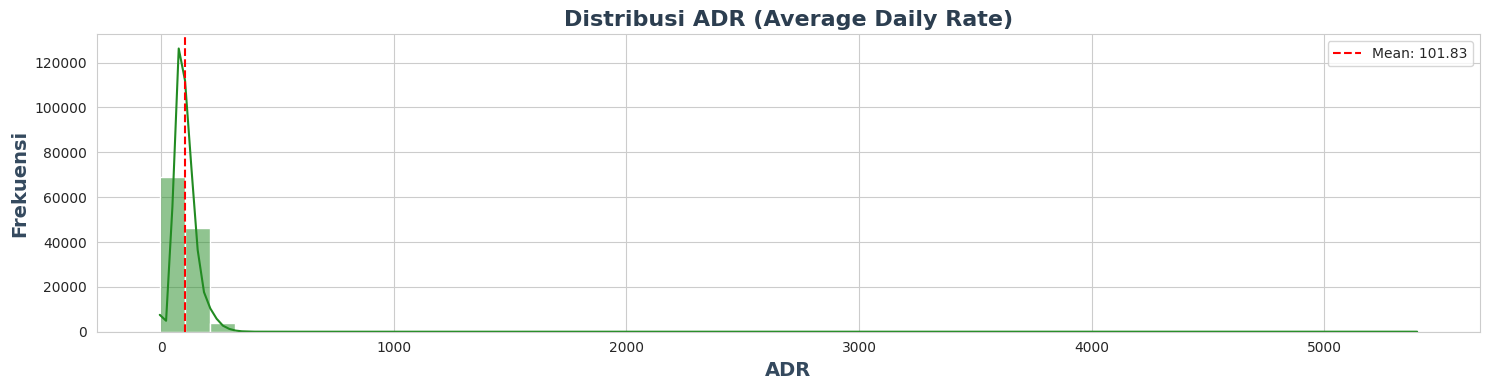

In [ ]:
mean_adr = data['adr'].mean()

plt.figure(figsize=(15, 4))
sns.histplot(data['adr'], bins=50, kde=True, color='forestgreen')
plt.axvline(mean_adr, color='red', linestyle='--', label=f'Mean: {mean_adr:.2f}')
plt.title('Distribusi ADR (Average Daily Rate)', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('ADR', fontsize=14, fontweight='bold', color='#34495E')
plt.ylabel('Frekuensi', fontsize=14, fontweight='bold', color='#34495E')

plt.legend()
plt.tight_layout()
plt.show()



> Untuk menjawab pertanyaan kedua, kami pertama menambahkan sebuah variabel/column baru yang mencerminkan total lama tinggal dengan memanfaatkan column '**stays_in_weekend_nights**' dan '**stays_in_week_nights**'



In [ ]:
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']



> Visualisasi pendapatan berdasarkan Musim dan Lama Tinggal dengan memanfaatkan column '**season**', '**adr**' dan '**total_stays**'



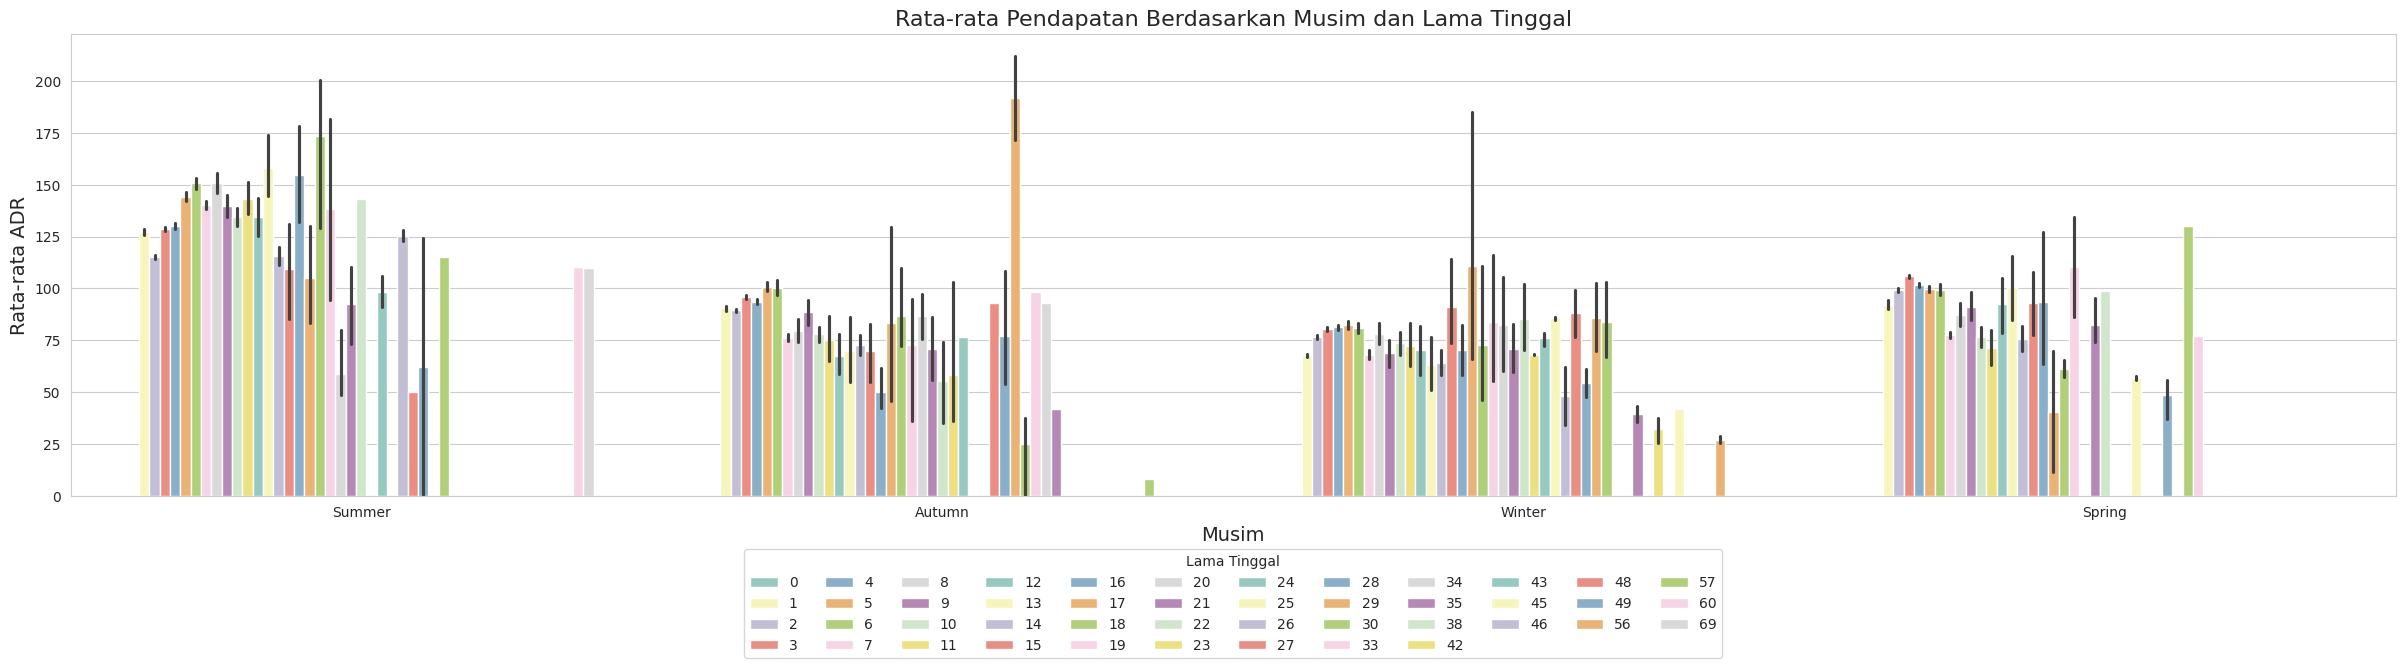

In [ ]:
plt.figure(figsize=(30, 6))
sns.barplot(data=data, x='season', y='adr', hue='total_stays', palette='Set3')
plt.title('Rata-rata Pendapatan Berdasarkan Musim dan Lama Tinggal', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Rata-rata ADR', fontsize=14)

plt.legend(title='Lama Tinggal', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=12)
plt.show()

In [ ]:
adr_summary = data.groupby(['season', 'total_stays'])['adr'].mean().reset_index()

print("Rata-rata Pendapatan Harian Berdasarkan Musim dan Lama Tinggal:")
print(adr_summary)

Rata-rata Pendapatan Harian Berdasarkan Musim dan Lama Tinggal:
     season  total_stays         adr
0    Autumn            0    0.000000
1    Autumn            1   90.357149
2    Autumn            2   89.431354
3    Autumn            3   95.933355
4    Autumn            4   93.515388
5    Autumn            5  100.768639
6    Autumn            6  100.336230
7    Autumn            7   76.107797
8    Autumn            8   79.688571
9    Autumn            9   88.823504
10   Autumn           10   77.858540
11   Autumn           11   75.096129
12   Autumn           12   67.674651
13   Autumn           13   69.830526
14   Autumn           14   72.633770
15   Autumn           15   69.963500
16   Autumn           16   49.946364
17   Autumn           17   83.537500
18   Autumn           18   86.563333
19   Autumn           19   72.533333
20   Autumn           20   86.530000
21   Autumn           21   71.017000
22   Autumn           22   55.387143
23   Autumn           23   58.333333
24   Autumn



> Terakhir, kami menampilkan Korelasi lama tinggal dan pendapatan



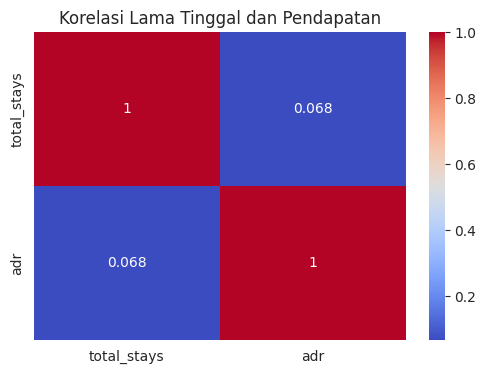

In [ ]:
correlation_data = data[['total_stays', 'adr']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Korelasi Lama Tinggal dan Pendapatan')
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> *Rata-rata pendapatan per reservasi adalah 101.83, dengan pendapatan harian tertinggi ditemukan pada musim panas dan lama tinggal 6 hari (150.66). Meskipun ada korelasi positif yang sangat lemah antara lama tinggal dan pendapatan, hubungan ini tidak signifikan.*


***


> *Meskipun terdapat sedikit hubungan antara lama tinggal dan pendapatan (korelasi positif), kekuatan hubungan tersebut sangat lemah, sehingga tidak cukup kuat untuk menunjukkan bahwa lama tinggal secara nyata mempengaruhi pendapatan. Oleh karena itu, hubungan ini tidak dapat dianggap signifikan atau berarti secara statistik.*


***


Dari Hasil Tahap ini, Kami telah membuat sebuah **Insight Baru** dalam bentuk sebuah variabel baru untuk membantu dalam analisis, yaitu column '**total_stays**' yang menunjukkan Lama Tinggal tamu/pelanggan

In [ ]:
data['total_stays'].sample(5)

,total_stays
48902,14
92299,4
30656,2
109323,7
63755,2


***


> Langkah terakhir, kami sebut dengan 'Pola Pembatalan'. Untuk mempelajari yang kedua dari Hotel itu sendiri kita mencari pola pembatalan, yang dimana dicerminkan dalam beberapa pertanyaan berikut.

***

> 1. Apakah pembatalan dipengaruhi oleh lead_time, jenis kamar, atau permintaan khusus?
> 2. Seberapa sering tamu yang sama membatalkan (menggunakan column '**is_repeated_guest**')?

***



> Pertanyaan pertama akan dijawab dengan melihat Korelasi antara **lead_time**, **total_of_special_requests**, dan **is_canceled**



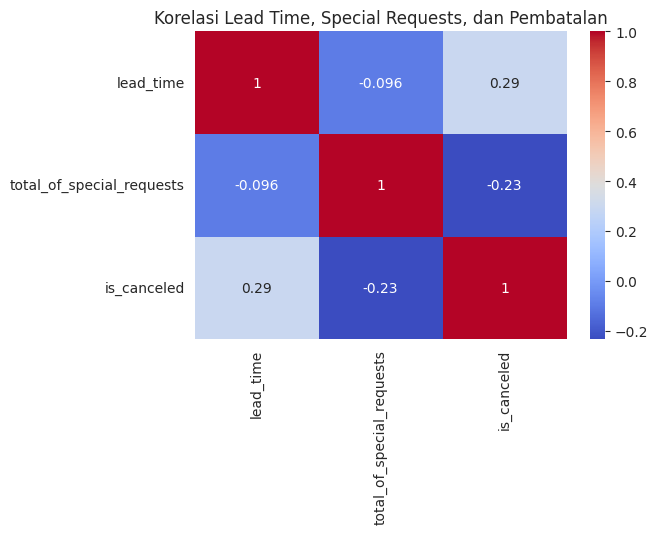

In [ ]:
correlation_cancel_data = data[['lead_time', 'total_of_special_requests', 'is_canceled']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_cancel_data, annot=True, cmap='coolwarm')
plt.title('Korelasi Lead Time, Special Requests, dan Pembatalan')
plt.show()



> Dan untuk menjawab pertanyaan kedua, kami memanfaatkan column '**is_repeated_guest**' dan '**is_canceled**'



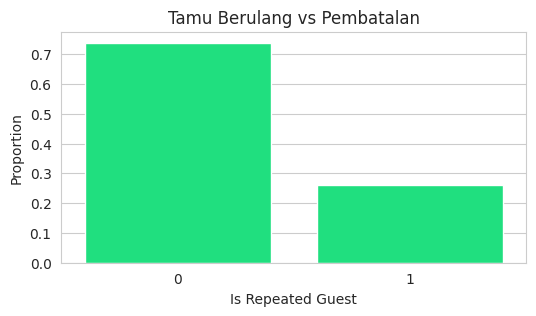

In [ ]:
repeated_guest_cancel_data = data.groupby('is_repeated_guest')['is_canceled'].value_counts(normalize=True).unstack()

plt.figure(figsize=(6, 3))
sns.barplot(data=repeated_guest_cancel_data, errorbar=None, color='springgreen')
plt.title('Tamu Berulang vs Pembatalan')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Proportion')
plt.show()

Ringkasan jawaban pertanyaan diatas, kami cantumkan sebagai berikut.
***


> *Lead time memiliki korelasi positif sedang dengan pembatalan (0.29), sedangkan jumlah permintaan khusus berkorelasi negatif lemah dengan lead time (-0.10) dan pembatalan (-0.23), menunjukkan bahwa pemesanan lebih awal lebih rentan dibatalkan, sementara lebih banyak permintaan khusus cenderung mengurangi pembatalan.*


***


> *Tamu non-berulang lebih cenderung membatalkan reservasi (37.8%) dibandingkan tamu berulang (14.5%).*


***


Dari Hasil Tahap Terakhir ini, Kami menemukan sebuah **Insight Baru** dalam bentuk sebuah variabel/column baru, yaitu column '**risk_score**' yang menunjukkan Skor risiko pembatalan

In [ ]:
risk_score = data['lead_time'] * (data['deposit_type'].map({'No Deposit': 1, 'Non Refund': 3, 'Refundable': 2}) * data['season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}))
data['risk_score'] = risk_score
data['risk_score'].sample(5)

,risk_score
49730,210
14584,2
107227,104
42928,192
79317,36


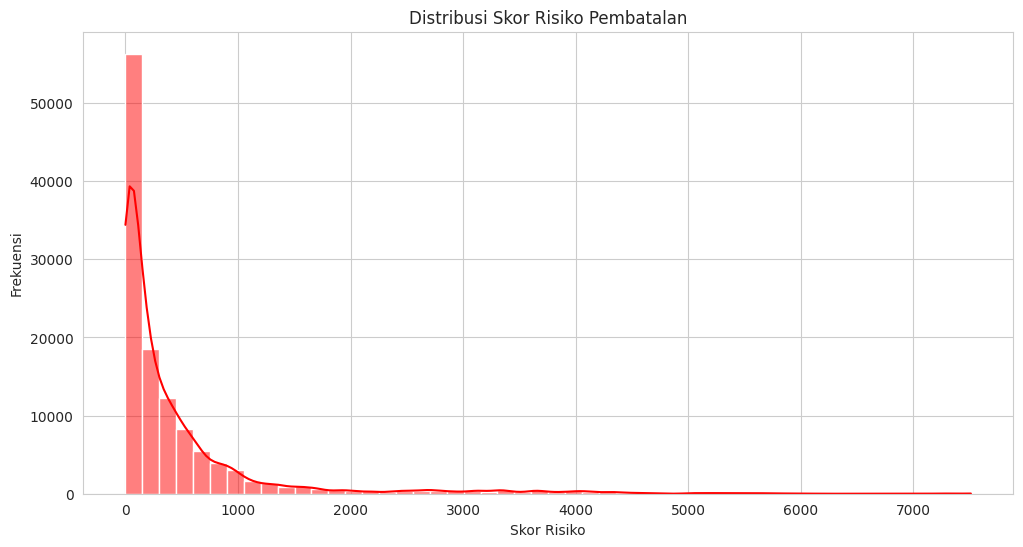

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data['risk_score'], bins=50, kde=True, color='red')
plt.title('Distribusi Skor Risiko Pembatalan')
plt.xlabel('Skor Risiko')
plt.ylabel('Frekuensi')
plt.show()

Ringkasan keseluruhan terkait **Insight Baru** yang ditemukan.
***


Analisis menghasilkan empat variabel baru untuk mendukung analisis musiman, keberhasilan reservasi, lama tinggal, dan risiko pembatalan, serta satu insight tambahan berupa persentase perubahan tipe kamar untuk memahami tingkat ketidaksesuaian kamar tanpa membuat variabel baru.

***


> **Insight Baru** : *Dibuat variabel baru untuk menunjukkan musim reservasi (Winter, Spring, Summer, Autumn) berdasarkan bulan kedatangan tamu.*

> **Tujuan** : *Membantu analisis pola musiman dalam reservasi.*


***


> **Insight Baru** : *Variabel baru yang menunjukkan rasio keberhasilan reservasi, dihitung dengan menggabungkan **previous_cancellations** dan **previous_bookings_not_canceled**.*

> **Tujuan** : *Menganalisis seberapa besar kemungkinan reservasi berhasil dilakukan.*


***


> **Insight Baru** : *Menghitung persentase perubahan kamar (perbedaan antara **reserved_room_type** dan **assigned_room_type**) untuk setiap jenis reservasi.*

> **Tujuan** : *Memahami tingkat ketidaksesuaian antara kamar yang dipesan dan yang diterima.*


***


> **Insight Baru** : *Dibuat variabel baru **total_stays**, yang menunjukkan total lama tinggal tamu.*

> **Tujuan** : *Mempermudah analisis terkait pengaruh durasi menginap terhadap pendapatan atau perilaku pelanggan.*


***


> **Insight Baru** : *Dibuat variabel baru **risk_score** untuk menilai tingkat risiko pembatalan reservasi.*

> **Tujuan** : *Membantu mengidentifikasi faktor atau kelompok dengan risiko pembatalan tinggi.*


***

**UPDATE DATASET**

In [ ]:
data.sample(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,stay_type,season,success_ratio,total_stays,risk_score
10195,Resort Hotel,1,0,2017,February,8,19,1,0,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,E,E,0,0,250.0,0,0,Transient-Party,80.00,0,0,Canceled,2017-02-19,2.0,1,Weekend,Winter,0.0,1,0
6975,Resort Hotel,1,25,2016,July,29,15,0,2,2,0.0,0,BB,FIN,Online TA,TA/TO,0,0,0,A,A,0,0,240.0,0,0,Transient,169.00,0,0,Canceled,2016-06-28,2.0,2,Weekday,Summer,0.0,2,75
673,Resort Hotel,1,16,2015,July,30,25,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,0,242.0,0,0,Transient,153.00,0,1,Canceled,2015-07-10,2.0,2,Weekend,Summer,0.0,2,48
90717,City Hotel,0,37,2016,June,24,9,0,1,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,0,9.0,0,0,Transient,108.90,0,1,Check-Out,2016-06-10,2.0,1,Weekday,Summer,0.0,1,111
68775,City Hotel,1,113,2017,May,20,20,2,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,1,34.0,0,0,Transient,190.00,0,0,Canceled,2017-01-27,1.0,3,Weekend,Spring,0.0,3,678
24538,Resort Hotel,0,32,2016,May,21,18,2,5,2,0.0,0,BB,CHE,Direct,Direct,0,0,0,F,F,0,0,250.0,0,0,Transient,121.00,1,1,Check-Out,2016-05-25,2.0,7,Weekend,Spring,0.0,7,64
7007,Resort Hotel,1,20,2016,July,29,16,2,3,2,0.0,0,BB,LUX,Online TA,TA/TO,0,0,0,D,D,0,0,240.0,0,0,Transient,194.00,0,0,Canceled,2016-06-27,2.0,5,Weekend,Summer,0.0,5,60
92899,City Hotel,0,65,2016,July,28,8,2,4,3,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,0,9.0,0,0,Transient,146.10,0,4,Check-Out,2016-07-14,3.0,6,Weekend,Summer,0.0,6,195
103450,City Hotel,0,18,2016,December,52,23,0,2,4,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,0,7.0,0,0,Transient,199.43,0,2,Check-Out,2016-12-25,4.0,2,Weekday,Winter,0.0,2,18
33575,Resort Hotel,0,88,2017,February,8,25,1,1,2,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,0,240.0,0,0,Transient,89.00,1,1,Check-Out,2017-02-27,4.0,2,Weekend,Winter,0.0,2,88


# **SISTEM PREDIKSI PEMBATALAN**

Program ini **Tidak Sepenuhnya** berkaitan dengan Hasil dari Tugas ini, hanya kami mendapatkan ide dari saat mempelajari dan menganalisis **Pola Pembatalan** untuk mencoba membuat sebuah sistem aplikasi prediksi pembatalan sederhana. Yang dimana program ini adalah sistem prediksi pembatalan reservasi hotel menggunakan model Machine Learning Classic yaitu **RandomForestClassifier**. Berikut Alur Programnya.

***

>  **Persiapan Data**  : *Program menggunakan variabel **lead_time**, **total_of_special_requests**, **total_stays**, **previous_cancellations**, dan **deposit_type** sebagai fitur untuk memprediksi pembatalan (**is_canceled**) sebagai target. Data kemudian dibagi menjadi data latih dan data uji menggunakan **train_test_split**.*

***

>  **Pelatihan Model**  : *Model RandomForestClassifier dilatih menggunakan data latih (**X_train**, **y_train**).*

***

>  **Fungsi Prediksi**  : *Fungsi **predict_cancellation** meminta input dari pengguna mengenai beberapa fitur (seperti lead time, total permintaan khusus, lama tinggal, jumlah pembatalan sebelumnya, dan tipe deposit). Berdasarkan input pengguna, program membuat prediksi apakah reservasi kemungkinan dibatalkan atau tidak dengan probabilitas.*

***

In [ ]:
features = ['lead_time', 'total_of_special_requests', 'total_stays', 'previous_cancellations', 'deposit_type']
target = 'is_canceled'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

def predict_cancellation(first_run):
    if first_run:
        print("\n\t=== Sistem Prediksi Pembatalan ===")
        print("-" *50)

    print("\nMasukkan Data")
    lead_time = float(input("Lead Time (Jumlah hari sebelum check-in) : "))
    total_special_requests = int(input("Total Permintaan Khusus (0-5)            : "))
    total_stays = int(input("Masukkan Total Lama Tinggal (dalam hari) : "))
    previous_cancellations = int(input("Jumlah Pembatalan Sebelumnya             : "))

    print("\nPilih tipe deposit (Default : No Deposit)")
    print("1. No Deposit")
    print("2. Refundable")
    print("3. Non Refund")

    deposit_choice = input("Masukkan angka pilihan (1/2/3)           : ").strip()

    if deposit_choice == "":
        print("Tidak ada pilihan yang dimasukkan. Menggunakan default 'No Deposit'.")
        deposit_type = 0
    elif deposit_choice == "1":
        deposit_type = 0
    elif deposit_choice == "2":
        deposit_type = 1
    elif deposit_choice == "3":
        deposit_type = 2
    else:
        print("Pilihan tidak valid. Menggunakan default 'No Deposit'.")
        deposit_type = 0

    print("-" * 50)

    input_data = pd.DataFrame([[lead_time, total_special_requests, total_stays, previous_cancellations, deposit_type]],
                              columns=features)

    prediction = model.predict_proba(input_data)[0][1]

    if prediction > 0.5:
        print("Hasil Prediksi :")
        print(f"Reservasi kemungkinan **dibatalkan** dengan probabilitas {prediction:.2f}.")
        print("-" *50)
    else:
        print("Hasil Prediksi :")
        print(f"Reservasi kemungkinan **tidak dibatalkan** dengan probabilitas {1 - prediction:.2f}.")
        print("-" *50)

first_run = True

while True:
    predict_cancellation(first_run)
    first_run = False
    continue_choice = input("Apakah Anda ingin melakukan prediksi lagi? (y/n): ").strip().lower()
    print("-" *50)
    if continue_choice != 'y':
        print("Terima kasih telah menggunakan sistem prediksi.")
        print("-" *50)
        break


	=== Sistem Prediksi Pembatalan ===
--------------------------------------------------

Masukkan Data
Lead Time (Jumlah hari sebelum check-in) : 20
Total Permintaan Khusus (0-5)            : 2
Masukkan Total Lama Tinggal (dalam hari) : 7
Jumlah Pembatalan Sebelumnya             : 0

Pilih tipe deposit (Default : No Deposit)
1. No Deposit
2. Refundable
3. Non Refund
Masukkan angka pilihan (1/2/3)           : 1
--------------------------------------------------
Hasil Prediksi :
Reservasi kemungkinan **tidak dibatalkan** dengan probabilitas 0.98.
--------------------------------------------------
Apakah Anda ingin melakukan prediksi lagi? (y/n): y
--------------------------------------------------

Masukkan Data
Lead Time (Jumlah hari sebelum check-in) : 20
Total Permintaan Khusus (0-5)            : 0
Masukkan Total Lama Tinggal (dalam hari) : 3
Jumlah Pembatalan Sebelumnya             : 0

Pilih tipe deposit (Default : No Deposit)
1. No Deposit
2. Refundable
3. Non Refund
Masukkan angka

# **README atau PENJELASAN**

**Pernyataan Masalah yang Dibahas**

Masalah utama yang dibahas adalah bagaimana pola reservasi dan perilaku pelanggan memengaruhi tingkat pembatalan, pendapatan, dan pengelolaan kamar di hotel. Fokus Utama analisis yang kami lakukan ini adalah untuk memahami faktor-faktor yang memengaruhi pembatalan, seperti *lead time*, permintaan khusus, tipe kamar yang dipesan, dan status tamu (berulang vs. non-berulang). Selain itu, kami juga ingin mengevaluasi bagaimana kebijakan deposit dan lama tinggal berhubungan dengan pendapatan serta pengelolaan permintaan dan perubahan kamar.

**Metodologi yang Digunakan**

Untuk membahas masalah ini, dataset yang digunakan mencakup **16 column dari dataset asli** dan tambahan **5 column baru** (*dibuat selama proses analisis*) yang mencakup berbagai informasi terkait reservasi, tamu, status reservasi, dan faktor lainnya. Metodologi yang digunakan meliputi:
- **Pembersihan Data**: Dilakukan penanganan Missing Value dan Mengubah type data column yang sesuai.
- **Eksplorasi Data**: Menganalisis distribusi tamu berdasarkan asal negara, jumlah malam tinggal, tren bulanan dan mingguan, serta yang lainnya yang sudah dijelaskan secara detail pada bagian ***Insight/Menemukan Pola-Pola***.
- **Analisis Korelasi**: Mengidentifikasi hubungan antara *lead time*, pembatalan, dan faktor-faktor lainnya seperti permintaan khusus dan faktor lain sebagainya.
- **Segmentasi dan Pembandingan**: Membandingkan perilaku tamu berulang vs. non-berulang dan memeriksa perbedaan antara reservasi dengan deposit refundable dan non-refundable.
- **Pembuatan Variabel Baru**: Membuat variabel tambahan seperti contohnya "rata-rata tamu per reservasi" dan "persentase perubahan kamar" untuk memberikan wawasan yang lebih mendalam.

**Wawasan Menarik yang Diberikan Analisis**

Beberapa wawasan yang menarik dari analisis ini adalah:
1. **Konsentrasi Tamu dari Negara Tertentu**: Tamu asal Portugal mendominasi jumlah reservasi, dengan Inggris dan Prancis mengikuti.
2. **Tren Pembatalan yang Signifikan**: Meskipun ada lonjakan reservasi pada bulan-bulan tertentu, tingkat pembatalan juga tinggi, terutama pada minggu ke-33 dan ke-30.
3. **Perilaku Pembatalan Berdasarkan Lead Time**: Reservasi dengan *lead time* lebih pendek cenderung lebih sedikit dibatalkan, namun pemesanan yang lebih awal lebih rentan dibatalkan.
4. **Hubungan Deposit dan Pembatalan**: Pemesanan tanpa deposit lebih sedikit dibatalkan, sedangkan hampir semua pemesanan dengan deposit non-refundable dibatalkan.

**Implikasi Analisis Terhadap Konsumen**

Berdasarkan analisis ini, beberapa implikasi bagi konsumen adalah:
1. **Fleksibilitas Pembatalan**: Konsumen yang memesan dengan *lead time* lebih pendek mungkin akan lebih diuntungkan dengan kebijakan pembatalan yang lebih fleksibel.  
2. **Pilihan Pembayaran Deposit**: Konsumen yang memilih opsi deposit non-refundable harus lebih berhati-hati karena ada kemungkinan besar pemesanan mereka akan dibatalkan, sehingga kebijakan deposit perlu disosialisasikan dengan jelas.
3. **Pengalaman Menginap**: Dengan memahami preferensi permintaan khusus, hotel dapat meningkatkan pengalaman tamu, yang berpotensi mengurangi tingkat pembatalan.
4. **Tamu Non-Ulang**: Hotel dapat mengurangi pembatalan dari tamu non-berulang dengan menawarkan insentif atau kemudahan pembatalan yang lebih fleksibel.

**Keterbatasan Analisis dan Peningkatan yang Dapat Dilakukan**

Beberapa keterbatasan yang ada dalam analisis ini antara lain:
1. **Keterbatasan Variabel**: Analisis hanya menggunakan data yang ada tanpa mempertimbangkan faktor eksternal lain yang bisa mempengaruhi perilaku reservasi, seperti cuaca, event lokal, atau kondisi ekonomi global.
2. **Hubungan yang Lemah antara Lama Tinggal dan Pendapatan**: Meskipun ada korelasi antara lama tinggal dan pendapatan, hubungan ini sangat lemah dan tidak cukup signifikan untuk diandalkan. Penelitian lebih lanjut dapat dilakukan untuk mengidentifikasi faktor lain yang lebih memengaruhi pendapatan.
3. **Pengaruh Faktor Musiman**: Analisis ini tidak memperhitungkan faktor musiman yang lebih mendalam, seperti liburan khusus atau event yang dapat mempengaruhi pola reservasi.
   
Peningkatan yang dapat dilakukan antara lain:
- **Faktor Eksternal**: Menambahkan faktor eksternal yang dapat mempengaruhi pola reservasi, seperti festival, cuaca, atau tren wisata musiman.
- **Analisis Waktu**: Memperdalam analisis berdasarkan waktu yang lebih rinci, seperti jam atau hari dalam minggu, untuk melihat apakah ada pola yang lebih kecil yang dapat dimanfaatkan.